In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

In [ ]:
df = pd.read_excel("F1_Flat.xlsx", sheet_name="Sheet2")
df.head()

,season,round,race_name,driver,constructor,laps,totalpitstops,stint,stint_length,pit_lap,...,tire_usage_aggression,fast_lap_attempts,position_changes,driver_aggression_score,abbreviation,tire_compound,tire_compound_code,year,month,day
0,2018,1,Australian Grand Prix,Kevin Magnussen,Haas F1 Team,22,1,1.0,21,22.0,...,0.045455,44.57282,0.695652,6.80083,MAG,SOFT,C5,2018,3,25
1,2018,1,Australian Grand Prix,Marcus Ericsson,Sauber,5,0,1.0,5,NaN,...,0.000000,NaN,0.782609,NaN,ERI,MEDIUMSOFT,C4,2018,3,25
2,2018,1,Australian Grand Prix,Pierre Gasly,Toro Rosso,13,0,1.0,13,NaN,...,0.000000,NaN,0.739130,NaN,GAS,SOFT,C5,2018,3,25
3,2018,1,Australian Grand Prix,Romain Grosjean,Haas F1 Team,24,1,1.0,23,24.0,...,0.041667,43.50182,0.652174,6.63518,GRO,SOFT,C5,2018,3,25
4,2018,4,Azerbaijan Grand Prix,Nico Hülkenberg,Renault,10,0,1.0,10,NaN,...,0.000000,NaN,0.739130,NaN,HUL,SOFT,C5,2018,4,29


# **Understand the Data**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5922 entries, 0 to 5921
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   5922 non-null   int64  
 1   round                    5922 non-null   int64  
 2   race_name                5922 non-null   object 
 3   driver                   5922 non-null   object 
 4   constructor              5922 non-null   object 
 5   laps                     5922 non-null   int64  
 6   totalpitstops            5922 non-null   int64  
 7   stint                    5921 non-null   float64
 8   stint_length             5922 non-null   int64  
 9   pit_lap                  3843 non-null   float64
 10  pit_time                 5884 non-null   float64
 11  circuit                  5922 non-null   object 
 12  position                 5922 non-null   int64  
 13  avgpitstoptime           5884 non-null   float64
 14  time_of_race            

,season,round,laps,totalpitstops,stint,stint_length,pit_lap,pit_time,position,avgpitstoptime,...,humidity_%,wind_speed_kmh,lap_time_variation,tire_usage_aggression,fast_lap_attempts,position_changes,driver_aggression_score,year,month,day
count,5922.000000,5922.000000,5922.000000,5922.000000,5921.000000,5922.000000,3843.000000,5884.000000,5922.000000,5884.000000,...,5922.000000,5922.000000,5884.000000,5922.000000,5884.000000,5922.000000,5884.000000,5922.000000,5922.000000,5922.000000
mean,2021.716819,10.856130,58.230834,2.172915,2.084783,20.220871,26.172001,90.329033,9.726613,127.869678,...,66.066061,11.349300,0.036628,0.039205,131.042894,0.379418,19.791108,2021.716819,6.765789,16.709558
std,1.728298,6.195506,11.404860,1.123135,1.084086,12.163756,15.537476,357.199960,5.394368,280.866714,...,16.339628,5.828930,0.092415,0.031056,255.872977,0.234538,38.417477,1.728298,2.997385,8.838589
min,2018.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,17.358500,...,18.000000,3.362500,0.000266,0.000000,3.191820,0.000000,0.588407,2018.000000,1.000000,2.000000
25%,2020.000000,6.000000,52.000000,1.000000,1.000000,12.000000,13.000000,-1.000000,5.000000,22.448125,...,58.250000,6.783333,0.001941,0.020000,40.916195,0.173913,6.261729,2020.000000,4.000000,9.000000
50%,2022.000000,11.000000,57.000000,2.000000,2.000000,19.000000,26.000000,22.053500,10.000000,24.463667,...,69.666667,9.400000,0.002604,0.035714,43.412070,0.391304,6.633648,2022.000000,7.000000,18.000000
75%,2023.000000,16.000000,66.000000,3.000000,3.000000,28.000000,37.000000,25.062500,14.000000,30.299625,...,77.333333,15.550000,0.004524,0.046512,45.362195,0.565217,6.909718,2023.000000,9.000000,24.000000
max,2024.000000,24.000000,87.000000,7.000000,8.000000,77.000000,78.000000,3069.017000,20.000000,3055.732000,...,87.916667,35.908333,1.000000,1.000000,2989.176180,0.826087,448.791707,2024.000000,12.000000,31.000000


In [ ]:
df.nunique().sort_values()

,0
season,7
year,7
totalpitstops,8
stint,8
tire_compound,8
tire_compound_code,8
month,12
constructor,16
position,20
position_changes,20


# **FEATURE ENGINEERING**

In [ ]:
df["pit_time"] = df["pit_time"].replace(-1, np.nan)

Identify expected number of stints

In [ ]:
df["expected_stints"] = df["totalpitstops"] + 1

Identify final stint correctly

In [ ]:
df["is_final_stint"] = df["stint"] == df["expected_stints"]

Identify real pit stops correctly

In [ ]:
df["is_pit_stop"] = df.apply(
    lambda row: 1 if (pd.notna(row["pit_lap"]) and pd.notna(row["pit_time"])) else 0,
    axis=1
)

Detect DNF / incomplete stint cases

In [ ]:
num_cols = ["stint", "laps", "totalpitstops", "pit_lap"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
def detect_dnf(group):
    group = group.copy()

    # Make sure key cols are numeric inside the group
    for col in ["stint", "laps", "pit_lap", "totalpitstops"]:
        group[col] = pd.to_numeric(group[col], errors="coerce")

    # Expected vs actual stints
    expected = group["totalpitstops"].iloc[0] + 1
    actual = group["stint"].nunique()

    # Sort by stint to get the last known stint
    group_sorted = group.sort_values("stint")
    last_row = group_sorted.iloc[-1]

    cond_missing_stints = actual < expected

    cond_pitted_on_last_lap = (
        pd.notna(last_row["pit_lap"])
        and pd.notna(last_row["laps"])
        and last_row["pit_lap"] == last_row["laps"]
    )

    return bool(cond_missing_stints and cond_pitted_on_last_lap)

# Apply per (season, round, driver)
dnf_flags = (
    df.groupby(["season", "round", "driver"])
      .apply(detect_dnf)
      .rename("is_dnf_end_of_pit")
      .reset_index()
)

# Merge flag back to all rows
df = df.merge(dnf_flags, on=["season", "round", "driver"], how="left")

/tmp/ipython-input-4178398092.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(detect_dnf)


In [ ]:
df["expected_stints"] = df["totalpitstops"] + 1
df["is_final_stint"] = df["stint"] == df["expected_stints"]

df["is_pit_stop"] = df.apply(
    lambda row: 1 if (pd.notna(row["pit_lap"]) and pd.notna(row["pit_time"])) else 0,
    axis=1
)


In [ ]:
df[["season","round","race_name","driver","stint","totalpitstops",
    "laps","pit_lap","is_pit_stop","is_final_stint","is_dnf_end_of_pit"]].head(30)


,season,round,race_name,driver,stint,totalpitstops,laps,pit_lap,is_pit_stop,is_final_stint,is_dnf_end_of_pit
0,2018,1,Australian Grand Prix,Kevin Magnussen,1.0,1,22,22.0,1,False,True
1,2018,1,Australian Grand Prix,Marcus Ericsson,1.0,0,5,NaN,0,True,False
2,2018,1,Australian Grand Prix,Pierre Gasly,1.0,0,13,NaN,0,True,False
3,2018,1,Australian Grand Prix,Romain Grosjean,1.0,1,24,24.0,1,False,True
4,2018,4,Azerbaijan Grand Prix,Nico Hülkenberg,1.0,0,10,NaN,0,True,False
5,2018,8,French Grand Prix,Sergio Pérez,1.0,0,27,NaN,0,True,False
6,2018,9,Austrian Grand Prix,Brendon Hartley,1.0,0,54,NaN,0,True,False
7,2018,9,Austrian Grand Prix,Nico Hülkenberg,1.0,0,11,NaN,0,True,False
8,2018,9,Austrian Grand Prix,Valtteri Bottas,1.0,0,13,NaN,0,True,False
9,2018,10,British Grand Prix,Charles Leclerc,1.0,1,18,18.0,1,False,True


# **CLEAN PITSTOP DATAFRAME**

In [ ]:
valid_pitstops = df[
    (df["is_pit_stop"] == 1) &
    (df["is_dnf_end_of_pit"] == False)
]

# **EDA**

**1- PIT STOP ANALYSIS**

Fastest Constructors

In [ ]:
fastest_teams = (
    valid_pitstops.groupby("constructor")["pit_time"]
    .mean()
    .sort_values()
)
fastest_teams.head(10)


,pit_time
constructor,
Force India,24.914800
Toro Rosso,25.092310
Sauber,65.852763
Racing Point,86.158660
Williams,112.124536
RB F1 Team,116.154870
Renault,117.476105
Haas F1 Team,124.967352
Red Bull,128.658810


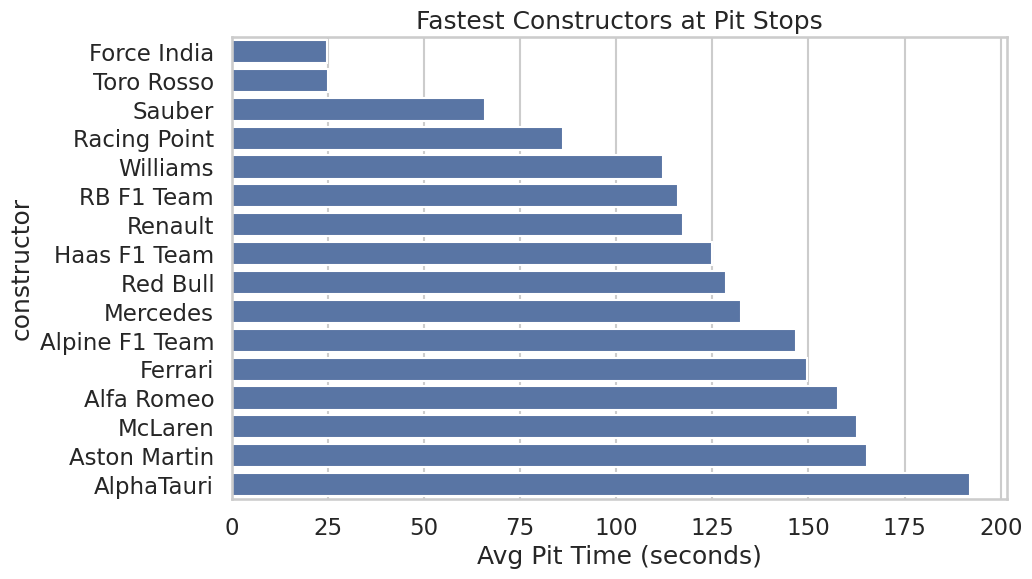

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=fastest_teams.values, y=fastest_teams.index)
plt.title("Fastest Constructors at Pit Stops")
plt.xlabel("Avg Pit Time (seconds)")
plt.show()

Fastest Drivers

In [ ]:
fastest_drivers = (
    valid_pitstops.groupby("driver")["pit_time"]
    .mean()
    .sort_values()
)
fastest_drivers.head(10)

,pit_time
driver,
Jack Doohan,22.080000
Brendon Hartley,23.142333
Nyck de Vries,23.557400
Franco Colapinto,23.839125
Marcus Ericsson,27.673000
Logan Sargeant,53.826000
Kevin Magnussen,79.308377
Guanyu Zhou,84.545114
Alexander Albon,96.294258


Pit Stop Time Distribution

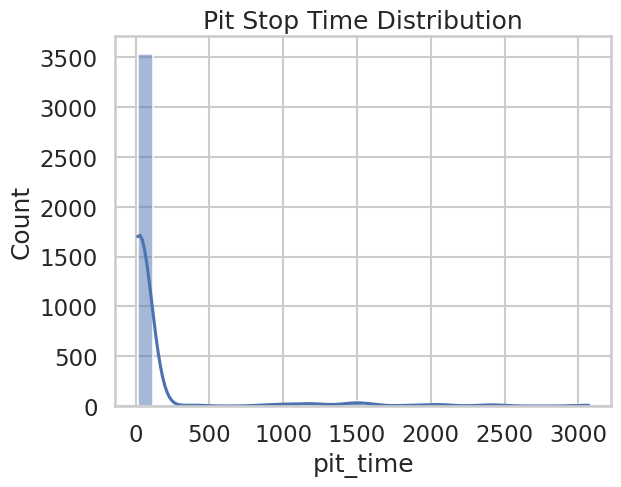

In [ ]:
sns.histplot(valid_pitstops["pit_time"], bins=30, kde=True)
plt.title("Pit Stop Time Distribution")
plt.show()

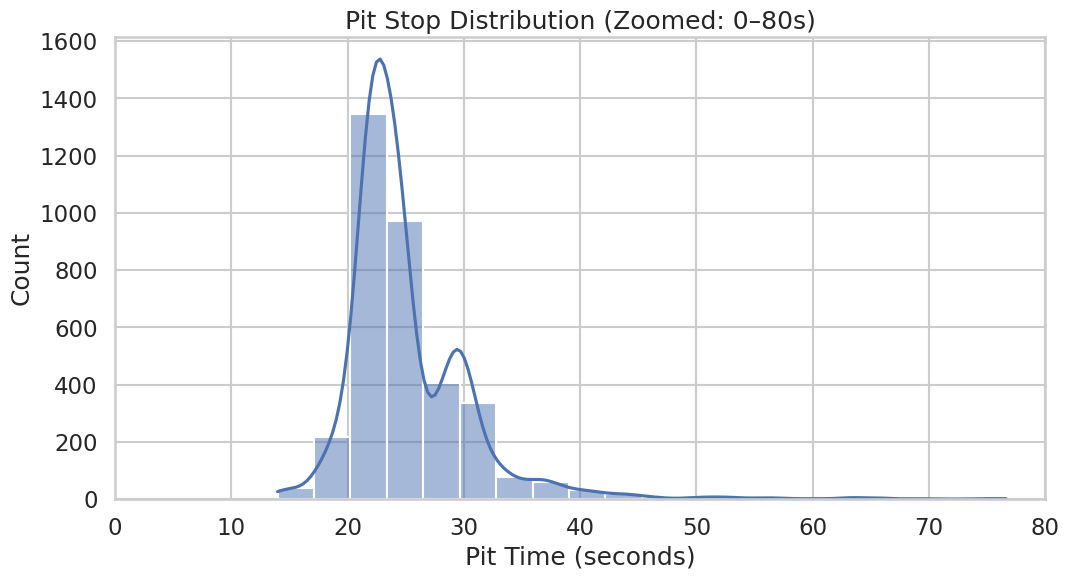

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(valid_pitstops[valid_pitstops["pit_time"] < 80]["pit_time"], bins=20, kde=True)

plt.title("Pit Stop Distribution (Zoomed: 0–80s)")
plt.xlabel("Pit Time (seconds)")
plt.xlim(0, 80)

plt.show()


**2- TIRE COMPOUND ANALYSIS**

Tire endurance: number of laps before change

In [ ]:
compound_endurance = (
    df.groupby("tire_compound")["stint_length"]
    .mean()
    .sort_values()
)
compound_endurance


,stint_length
tire_compound,
WET,6.389831
ULTRASOFT,10.333333
MEDIUM,14.368012
INTERMEDIATE,14.984925
SOFT,17.653846
MEDIUMHARD,19.176497
HARD,26.931200
MEDIUMSOFT,30.218750


Tire usage aggression impact on stint length

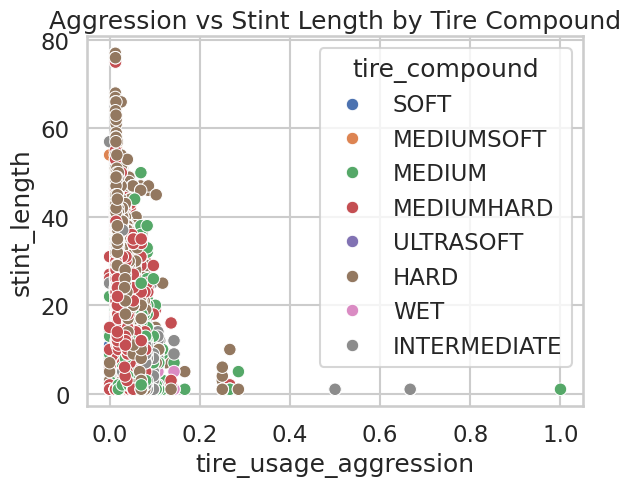

In [ ]:
sns.scatterplot(
    data=df,
    x="tire_usage_aggression",
    y="stint_length",
    hue="tire_compound"
)
plt.title("Aggression vs Stint Length by Tire Compound")
plt.show()

#0 = not aggressive, 1 = very aggressive

Tire compound usage per constructor

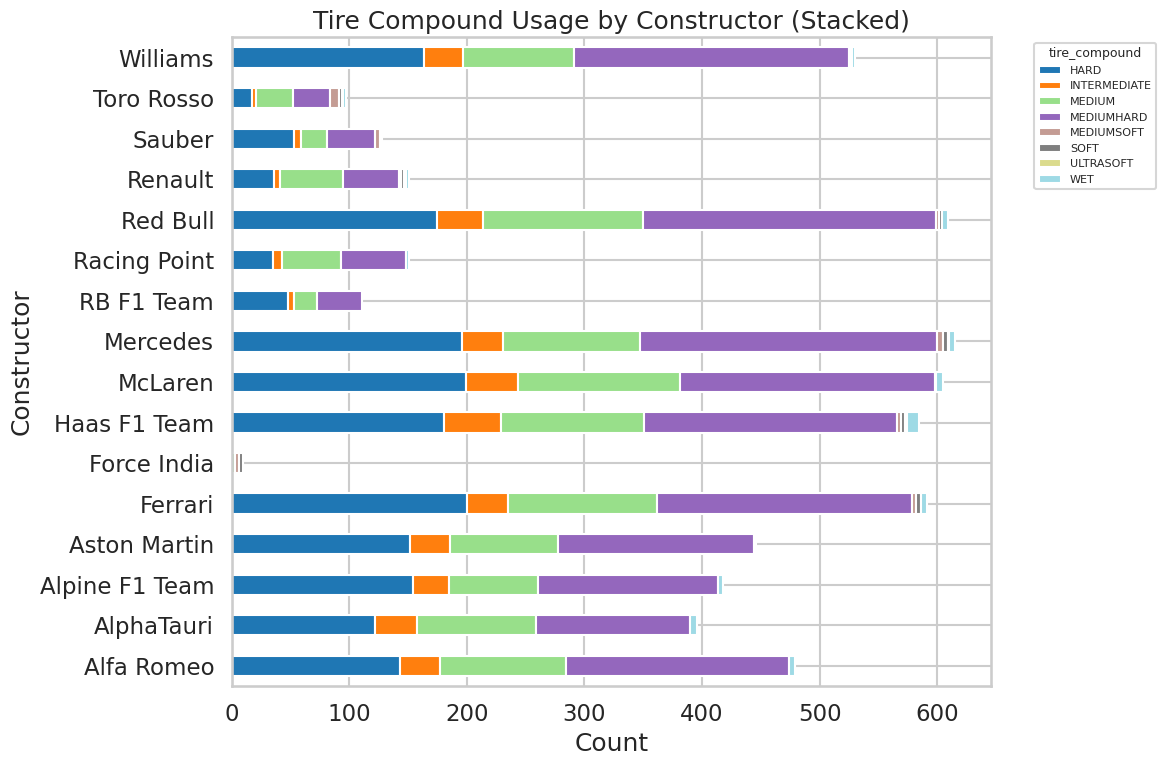

In [ ]:
compound_counts = df.groupby(["constructor", "tire_compound"]).size().unstack(fill_value=0)

compound_counts.plot(
    kind='barh',
    stacked=True,
    figsize=(12,8),
    colormap='tab20'
)

plt.legend(
    title="tire_compound",
    fontsize=8,
    title_fontsize=9,
    markerscale=0.6,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()


plt.title("Tire Compound Usage by Constructor (Stacked)")
plt.xlabel("Count")
plt.ylabel("Constructor")
plt.tight_layout()
plt.show()


**3- STINT ANALYSIS**

Average stint length per stint number

In [ ]:
df.groupby("stint")["stint_length"].mean()

,stint_length
stint,
1.0,17.612147
2.0,24.966764
3.0,19.661224
4.0,15.610825
5.0,10.118182
6.0,10.422222
7.0,6.500000
8.0,8.000000


Number of stints per driver

In [ ]:
df.groupby("driver")["stint"].count().sort_values(ascending=False).head(10)

,stint
driver,
Lewis Hamilton,313
Lando Norris,307
Max Verstappen,307
Pierre Gasly,304
Lance Stroll,299
Valtteri Bottas,295
George Russell,293
Charles Leclerc,291
Sergio Pérez,288


Pit stops per race

In [ ]:
df[df["is_pit_stop"]==1].groupby("race_name")["is_pit_stop"].count().sort_values(ascending=False).head(10)

,is_pit_stop
race_name,
Bahrain Grand Prix,263
Spanish Grand Prix,243
Hungarian Grand Prix,233
Dutch Grand Prix,214
British Grand Prix,206
United States Grand Prix,177
Austrian Grand Prix,153
Belgian Grand Prix,150
Italian Grand Prix,147


**4- DRIVER DEVELOPMENT THROUGH SEASONS**

Average pit-time per driver per season

In [ ]:
driver_progress = (
    valid_pitstops.groupby(["driver","season"])["pit_time"]
    .mean()
    .reset_index()
)
driver_progress

,driver,season,pit_time
0,Alexander Albon,2019,25.043880
1,Alexander Albon,2020,202.672033
2,Alexander Albon,2022,23.637517
3,Alexander Albon,2023,121.392579
4,Alexander Albon,2024,89.354676
...,...,...,...
139,Valtteri Bottas,2024,70.168500
140,Yuki Tsunoda,2021,282.951971
141,Yuki Tsunoda,2022,136.755100
142,Yuki Tsunoda,2023,208.146667


Example: Track a single driver’s progression

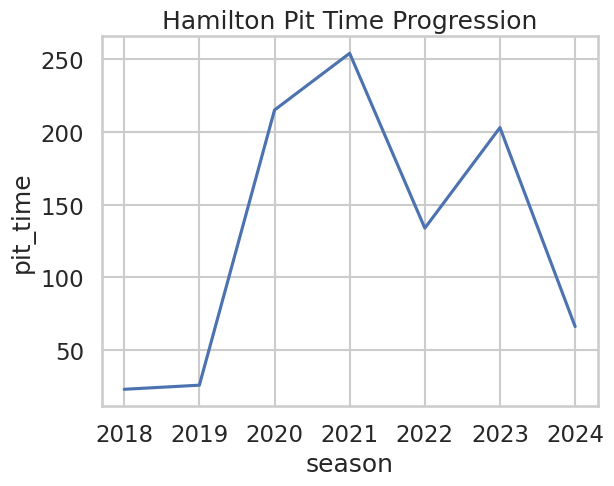

In [ ]:
sns.lineplot(
    data=driver_progress[driver_progress["driver"]=="Lewis Hamilton"],
    x="season", y="pit_time"
)
plt.title("Hamilton Pit Time Progression")
plt.show()


**5- DRIVER TEAM SWITCH ANALYSIS**

Detect drivers who changed teams

In [ ]:
driver_team_changes = (
    df.groupby("driver")["constructor"]
    .nunique()
    .sort_values(ascending=False)
)
driver_team_changes


,constructor
driver,
Daniel Ricciardo,5
Nico Hülkenberg,4
Pierre Gasly,4
Valtteri Bottas,3
Sergio Pérez,3
Alexander Albon,3
Carlos Sainz,3
Lance Stroll,3
Esteban Ocon,3


Performance before/after constructor switch(Carlos Sainz)

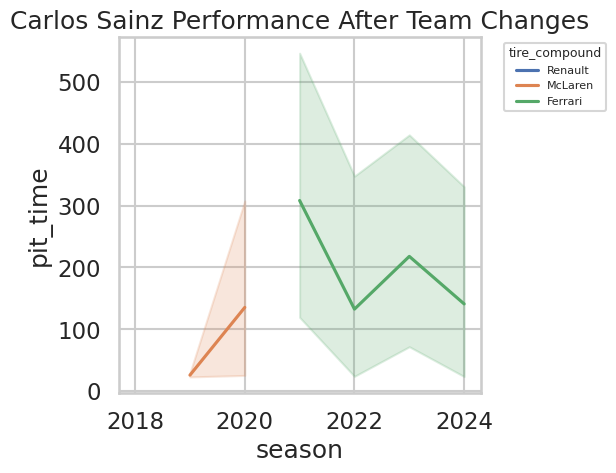

In [ ]:
sainz_data = valid_pitstops[valid_pitstops["driver"]=="Carlos Sainz"]

sns.lineplot(
    data=sainz_data,
    x="season", y="pit_time",
    hue="constructor"
)

plt.legend(
    title="tire_compound",
    fontsize=8,
    title_fontsize=9,
    markerscale=0.6,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()

plt.title("Carlos Sainz Performance After Team Changes")
plt.show()


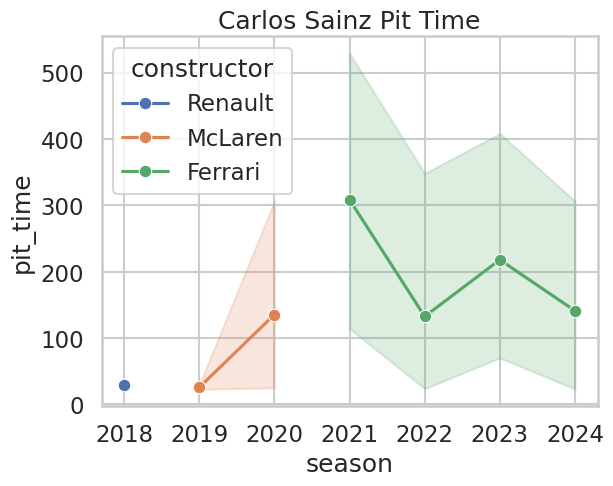

In [ ]:
sainz_data = valid_pitstops[valid_pitstops["driver"]=="Carlos Sainz"]

sns.lineplot(
    data=sainz_clean,
    x="season", y="pit_time",
    hue="constructor", marker="o"
)
plt.title("Carlos Sainz Pit Time (Cleaned <100s)")
plt.show()


In [ ]:

sns.lineplot(
    data=sainz_clean,
    x="season", y="pit_time",
    hue="constructor", marker="o"
)
plt.title("Carlos Sainz Pit Time (Cleaned <100s)")
plt.show()


NameError: name 'sainz_clean' is not defined

**6- CIRCUIT ANALYSIS (TIRE-DEMAND TRACKS)**

Circuits with most pit stops

In [ ]:
pit_stops_by_circuit = (
    df[df["is_pit_stop"]==1]
    .groupby("circuit")["is_pit_stop"]
    .count()
    .sort_values(ascending=False)
)

pit_stops_by_circuit.head(10)


,is_pit_stop
circuit,
Bahrain International Circuit,295
Silverstone Circuit,247
Circuit de Barcelona-Catalunya,243
Hungaroring,233
Circuit Park Zandvoort,214
Red Bull Ring,198
Circuit of the Americas,177
Circuit de Spa-Francorchamps,150
Autodromo Nazionale di Monza,147


Visualization

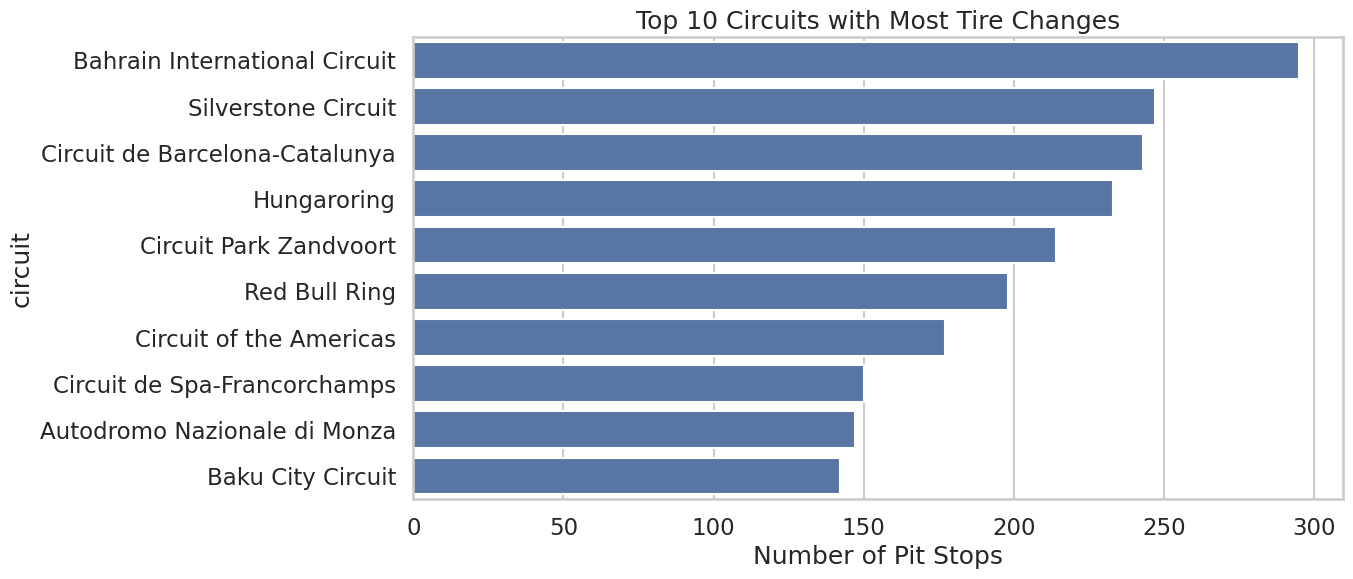

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=pit_stops_by_circuit.values[:10],
    y=pit_stops_by_circuit.index[:10]
)
plt.title("Top 10 Circuits with Most Tire Changes")
plt.xlabel("Number of Pit Stops")
plt.show()

**7- WEATHER IMPACT ANALYSIS**

Track temp vs pit time

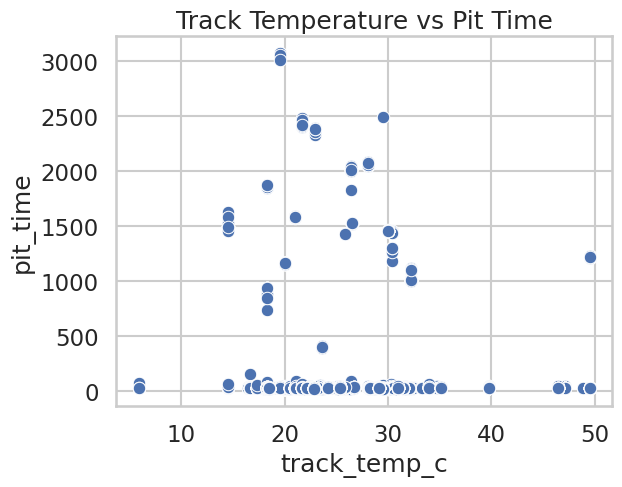

In [ ]:
sns.scatterplot(
    data=valid_pitstops,
    x="track_temp_c", y="pit_time"
)
plt.title("Track Temperature vs Pit Time")
plt.show()

Humidity vs pit time

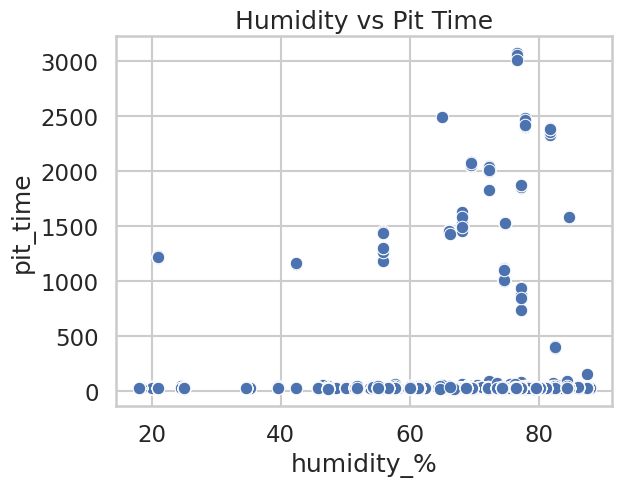

In [ ]:
sns.scatterplot(
    data=valid_pitstops,
    x="humidity_%", y="pit_time"
)
plt.title("Humidity vs Pit Time")
plt.show()